In [1]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
from omero.gateway import BlitzGateway
import omero
import getpass
import matplotlib.pylab as plt

### Connecting to OMERO

In [3]:
PASSWORD = getpass.getpass('Enter your password')

USERNAME = "dwaithe"
HOST = "cbomero.imm.ox.ac.uk"
PORT = 4064

conn = BlitzGateway(USERNAME, PASSWORD, host=HOST, port=PORT)
connected = conn.connect()
print(connected)

Enter your password ·················


True


### Downloading image from OMERO

In [4]:
# Pixels and Channels will be loaded automatically as needed
imageId = 164467
image = conn.getObject("Image", imageId)
print (image.getName(), image.getDescription())
# Retrieve information about an image.
print (" X:", image.getSizeX())
print (" Y:", image.getSizeY())
print (" Z:", image.getSizeZ())
print (" C:", image.getSizeC())
print (" T:", image.getSizeT())
# List Channels (loads the Rendering settings to get channel colors)
for channel in image.getChannels():
    print ('Channel:', channel.getLabel(),)
    print ('Color:', channel.getColor().getRGB())
    print ('Lookup table:', channel.getLut())
    print ('Is reverse intensity?', channel.isReverseIntensity())

# render the first timepoint, mid Z section
z = image.getSizeZ() / 2
t = 0
rendered_image = image.renderImage(z, t)
rendered_image.show()               # popup (use for debug only)
# rendered_image.save("test.jpg")     # save in the current folder

img_000000004_Default_000.tif 
 X: 1024
 Y: 1024
 Z: 1
 C: 1
 T: 1
Channel: 0
Color: (128, 128, 128)
Lookup table: None
Is reverse intensity? False


### Reading ROI from OMERO.


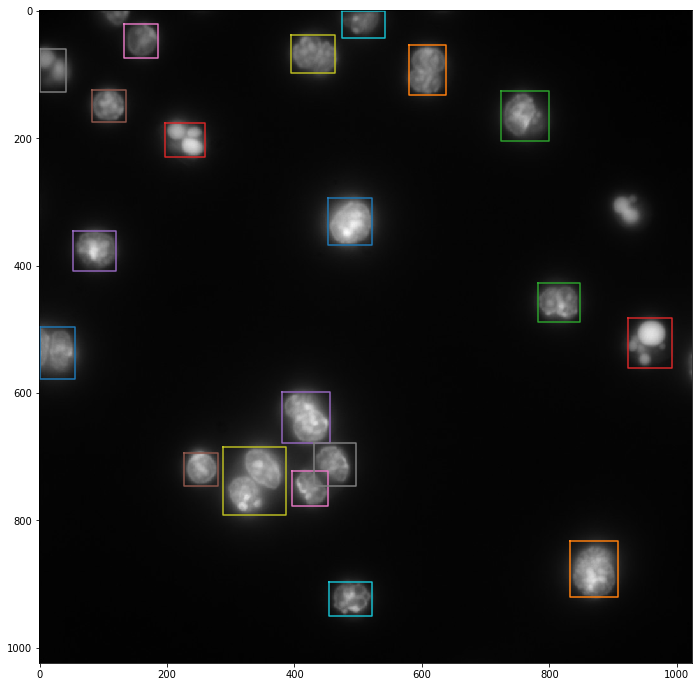

In [5]:
roi_service = conn.getRoiService()
plt.figure(figsize=(12,12))
result = roi_service.findByImage(imageId, None)
for roi in result.rois:
    #print ("ROI:  ID:", roi.getId().getValue())
    for s in roi.copyShapes():
        shape = {}
        shape['id'] = s.getId().getValue()
        #shape['theT'] = s.getTheT().getValue()
        shape['theZ'] = s.getTheZ().getValue()
        if s.getTextValue():
            shape['textValue'] = s.getTextValue().getValue()
        if type(s) == omero.model.RectangleI:
            shape['type'] = 'Rectangle'
            shape['x'] = s.getX().getValue()
            shape['y'] = s.getY().getValue()
            shape['width'] = s.getWidth().getValue()
            shape['height'] = s.getHeight().getValue()
        elif type(s) in (
                omero.model.LabelI, omero.model.PolygonI):
            print (type(s), " Not supported by this code")
        # Do some processing here, or just print:
        #print( "   Shape:",)
        #for key, value in shape.items():
        #    print ("  ", key, value,)
        #print( "")
        x = shape['x']
        y = shape['y']
        wid = shape['width'] 
        hei = shape['height']
        
        plt.plot([x,x+wid,x+wid,x,x],[y,y,y+hei,y+hei,y])

plt.imshow(rendered_image)

In [ ]:
shape['x']